# 1장. 서울시 구별 CCTV 현황 분석

## 1-2 파이썬에서 텍스트 파일과 엑셀 파일 읽기 - pandas

In [1]:
import pandas as pd
CCTV_Seoul = pd.read_csv('./data/01. CCTV_in_Seoul.csv', encoding = 'utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [2]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [3]:
CCTV_Seoul.columns[0]

'기관명'

In [4]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace = True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


Excel 파일 읽는 법  
근데 그냥 읽게 되면 아래와 같이 이상하게 나오게 된다.  
원본 엑셀 파일의 첫 세 줄이 열의 제목처럼 되어 있기 때문

In [5]:
pop_Seoul = pd.read_excel('./data/01. population_in_Seoul.xls', encoding = 'utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


그래서 추가적인 옵션을 좀 더 많이 적용하도록 한다.
header = 2 즉, 3번째 행부터 읽으라는 옵션을 걸고, B, D, G, J, N 열만 읽도록 옵션을 준다

In [6]:
pop_Seoul = pd.read_excel('./data/01. population_in_Seoul.xls',
                         header = 2,
                         parse_cols = 'B, D, G, J, N',
                         encoding = 'utf-8')
pop_Seoul.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  after removing the cwd from sys.path.


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


컬럼 이름 수정  
Dictionary 형태라 {} -> Set 형태로 주어줘야함

In [7]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                            pop_Seoul.columns[1] : '인구수',
                            pop_Seoul.columns[2] : '한국인',
                            pop_Seoul.columns[3] : '외국인',
                            pop_Seoul.columns[4] : '고령자'}, inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### 1-3 pandas 기초 익히기

In [8]:
import numpy as np
import pandas as pd

In [9]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [10]:
dates = pd.date_range('20130101', periods = 6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns = ['A','B','C','D'])
df

,A,B,C,D
2013-01-01,1.268742,-1.225124,0.374213,1.684208
2013-01-02,-1.939624,0.783089,0.145467,-0.927276
2013-01-03,0.451566,-1.775532,0.002729,-2.090963
2013-01-04,-1.402012,1.810583,0.219493,0.369631
2013-01-05,-1.106813,0.032751,-0.655584,-0.636549
2013-01-06,-0.843022,0.121316,-0.969277,-1.512608


head 명령은 기본적으로 첫 5행을 보여주는데 숫자를 지정해주면 그 숫자만큼의 행을 보여준다  

In [12]:
df.head(3)

,A,B,C,D
2013-01-01,1.268742,-1.225124,0.374213,1.684208
2013-01-02,-1.939624,0.783089,0.145467,-0.927276
2013-01-03,0.451566,-1.775532,0.002729,-2.090963


In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.values

array([[ 1.26874155, -1.22512404,  0.37421308,  1.68420758],
       [-1.939624  ,  0.78308948,  0.14546748, -0.92727552],
       [ 0.45156553, -1.77553249,  0.00272894, -2.09096343],
       [-1.40201155,  1.81058337,  0.2194934 ,  0.36963067],
       [-1.10681278,  0.03275138, -0.65558413, -0.63654892],
       [-0.8430224 ,  0.12131606, -0.96927666, -1.51260772]])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


describe() 명령으로 통계적 개요를 확인 가능  
평균, min, max, 각 1/4 지점, 표준편차 등

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.595194,-0.042153,-0.147160,-0.518926
std,1.212566,1.307671,0.538281,1.362543
min,-1.939624,-1.775532,-0.969277,-2.090963
25%,-1.328212,-0.910655,-0.491006,-1.366275
50%,-0.974918,0.077034,0.074098,-0.781912
75%,0.127919,0.617646,0.200987,0.118086
max,1.268742,1.810583,0.374213,1.684208


sort_values 명령은 by로 지정된 컬럼을 기준으로 정렬한다  
ascending이 True면 오름차순, False면 내림차순으로 정렬시킨다

In [18]:
df.sort_values(by = 'B', ascending = False)

,A,B,C,D
2013-01-04,-1.402012,1.810583,0.219493,0.369631
2013-01-02,-1.939624,0.783089,0.145467,-0.927276
2013-01-06,-0.843022,0.121316,-0.969277,-1.512608
2013-01-05,-1.106813,0.032751,-0.655584,-0.636549
2013-01-01,1.268742,-1.225124,0.374213,1.684208
2013-01-03,0.451566,-1.775532,0.002729,-2.090963


DataFrame 객체인 경우 변수명 뒤에 ['A']와 같이 적어주면 해당 컬럼만 Series로 보여준다  
특정 행만 보고 싶은 경우에는 행의 범위만 지정해서 df[0:3]으로 지정해주면 된다

In [19]:
df['A']

2013-01-01    1.268742
2013-01-02   -1.939624
2013-01-03    0.451566
2013-01-04   -1.402012
2013-01-05   -1.106813
2013-01-06   -0.843022
Freq: D, Name: A, dtype: float64

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,1.268742,-1.225124,0.374213,1.684208
2013-01-02,-1.939624,0.783089,0.145467,-0.927276
2013-01-03,0.451566,-1.775532,0.002729,-2.090963


2013.01.02부터 2013.01.04 까지의 행을 보고 싶다면 다음과 같이 넘겨주면 된다  

In [21]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.939624,0.783089,0.145467,-0.927276
2013-01-03,0.451566,-1.775532,0.002729,-2.090963
2013-01-04,-1.402012,1.810583,0.219493,0.369631


### loc
특정 변수를 이용하고 싶다면 다음과 같은 형식도 가능하다

In [22]:
df.loc[dates[0]]

A    1.268742
B   -1.225124
C    0.374213
D    1.684208
Name: 2013-01-01 00:00:00, dtype: float64

특정 열의 모든 행을 보고싶다면 다음과 같이 조건을 주면 된다

In [23]:
df.loc[:,['A','B']]

,A,B
2013-01-01,1.268742,-1.225124
2013-01-02,-1.939624,0.783089
2013-01-03,0.451566,-1.775532
2013-01-04,-1.402012,1.810583
2013-01-05,-1.106813,0.032751
2013-01-06,-0.843022,0.121316


### iloc
loc 명령과 달리 행과 열의 번호를 이용해서 데이터에 바로 접근할 수 있는 방법도 있다.  
그 명령이 iloc. 행이나 열의 범위를 지정하면 된다.  

In [24]:
df.iloc[3]

A   -1.402012
B    1.810583
C    0.219493
D    0.369631
Name: 2013-01-04 00:00:00, dtype: float64

In [25]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.402012,1.810583
2013-01-05,-1.106813,0.032751


DataFrame에서 특정 조건을 만족하는 데이터만 얻어오는 것도 가능하다   

In [26]:
df

,A,B,C,D
2013-01-01,1.268742,-1.225124,0.374213,1.684208
2013-01-02,-1.939624,0.783089,0.145467,-0.927276
2013-01-03,0.451566,-1.775532,0.002729,-2.090963
2013-01-04,-1.402012,1.810583,0.219493,0.369631
2013-01-05,-1.106813,0.032751,-0.655584,-0.636549
2013-01-06,-0.843022,0.121316,-0.969277,-1.512608


In [27]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.268742,-1.225124,0.374213,1.684208
2013-01-03,0.451566,-1.775532,0.002729,-2.090963


데이터 전체에서 조건을 걸면 만족하지 않은 곳은 NaN 처리가 된다

In [28]:
df[df > 0]

,A,B,C,D
2013-01-01,1.268742,NaN,0.374213,1.684208
2013-01-02,NaN,0.783089,0.145467,NaN
2013-01-03,0.451566,NaN,0.002729,NaN
2013-01-04,NaN,1.810583,0.219493,0.369631
2013-01-05,NaN,0.032751,NaN,NaN
2013-01-06,NaN,0.121316,NaN,NaN


### DataFrame 복사
그냥 = 으로 할당하게 되면 값이 복사되는 것이 아니라 reference 만 복사되기 때문에  
원본 데이터는 하나만 있게 된다.  
copy를 원할 경우는 df.copy()를 이용한다

In [29]:
df2 = df.copy()

In [30]:
df2['E'] = ['one', 'two', 'three', 'four', 'five', 'six']
df2

,A,B,C,D,E
2013-01-01,1.268742,-1.225124,0.374213,1.684208,one
2013-01-02,-1.939624,0.783089,0.145467,-0.927276,two
2013-01-03,0.451566,-1.775532,0.002729,-2.090963,three
2013-01-04,-1.402012,1.810583,0.219493,0.369631,four
2013-01-05,-1.106813,0.032751,-0.655584,-0.636549,five
2013-01-06,-0.843022,0.121316,-0.969277,-1.512608,six


DataFrame에서 새로운 컬럼 추가

In [31]:
df2['F'] = [1,2,3,4,5,6]
df2

,A,B,C,D,E,F
2013-01-01,1.268742,-1.225124,0.374213,1.684208,one,1
2013-01-02,-1.939624,0.783089,0.145467,-0.927276,two,2
2013-01-03,0.451566,-1.775532,0.002729,-2.090963,three,3
2013-01-04,-1.402012,1.810583,0.219493,0.369631,four,4
2013-01-05,-1.106813,0.032751,-0.655584,-0.636549,five,5
2013-01-06,-0.843022,0.121316,-0.969277,-1.512608,six,6


어떤 컬럼에서 ~한 요소가 있는지 검사할 때는 isin 명령을 사용

In [32]:
df2['E'].isin(['two','three'])

2013-01-01    False
2013-01-02     True
2013-01-03     True
2013-01-04    False
2013-01-05    False
2013-01-06    False
Freq: D, Name: E, dtype: bool

위가 2, 3 행만 True이기 때문에 그 결과를 넣어주면 2, 3행만 뽑힌다

In [33]:
df2[df2['E'].isin(['two','three'])]

,A,B,C,D,E,F
2013-01-02,-1.939624,0.783089,0.145467,-0.927276,two,2
2013-01-03,0.451566,-1.775532,0.002729,-2.090963,three,3


df 변수에서 통계적인 데이터를 보고 싶을 때는 특정 함수를 적용시키면 좋다  
이때 사용하는 것이 apply 명령이다  
예로 누적합을 알고싶을 때 적용하는 방법을 소개한다

In [34]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,1.268742,-1.225124,0.374213,1.684208
2013-01-02,-0.670882,-0.442035,0.519681,0.756932
2013-01-03,-0.219317,-2.217567,0.522409,-1.334031
2013-01-04,-1.621328,-0.406984,0.741903,-0.964401
2013-01-05,-2.728141,-0.374232,0.086319,-1.600950
2013-01-06,-3.571164,-0.252916,-0.882958,-3.113557


최대값과 최소값의 차이 (혹은 거리)를 알고싶다면 lambda 함수를 이용한다

In [35]:
df.apply(lambda x: x.max() - x.min())

A    3.208366
B    3.586116
C    1.343490
D    3.775171
dtype: float64

## 1-4 pandas 이용해서 CCTV와 인구 현황 데이터 파악하기 
이제 두 데이터를 정리한다

In [36]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


CCTV가 가장 적은 구는 도봉구 마포구 송파구 중랑구 중구임을 알 수있다.

In [37]:
CCTV_Seoul.sort_values(by = '소계', ascending = True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


CCTV가 가장 많은 구는 강남구 양천구 서초구 은평구 용산구로 나타난다

In [38]:
CCTV_Seoul.sort_values(by = '소계', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


CCTV 최근 증가율을 계산한다  
pandas에서는 아래와 같이 간단한 방법으로 column을 늘릴 수 있다.  
이는 따로 리턴하지 않아도 적용되도록 구현되어 있다.  
최근 증가율 계산은 최근 3년간 CCTV수를 더하고 2013년 이전 CCTV수로 나눠서 최근 3년간 CCTV 증가율을 계산한다  
이렇게 최근 증가율을 기준으로 내림차순으로 정렬해서 최근 CCTV증가율이 가장 높은 곳을 확인 가능하다.

In [39]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] +
                            CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by = '최근증가율', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


이번에는 서울시 인구 현황을 정리해보자

In [40]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


pop_Seoul 변수를 확인했더니 0번 행에 합계가 보이는데, 현재 나에게는 필요가 없기 때문에  
drop 명령을 사용해서 삭제한다  
여기서 inplace = True는 변수를 직접 변경한다는 뜻이다  
즉, return 받을 필요없이 바로 변경해준다는 뜻이고 inplace = False라면  
변수를 직접 변경하지 않는다

In [41]:
pop_Seoul.drop([0], inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


그리고 pop_Seoul 데이터의 '구별' 컬럼의 unique를 조사한다.   
유니크 조사는 반복된 데이터는 하나로 나타내서 한 번 이상 나타난 데이터를 확인한다

In [42]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

이렇게 유니크 조사를 했더니 제일 끝네 Nan이 보인다.  
이 NaN이 어디있는지 확인하려면 조건문을 사용해야한다  
isnull 명령으로 NaN 데이터를 추출가능하다

In [43]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [44]:
pop_Seoul.drop([26], inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


이제 구별 외국인 비율과 고령자 비율을 계산한다

In [45]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


이제 각 컬럼별로 내림차순으로 정렬한다

In [46]:
pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [47]:
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [48]:
pop_Seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [49]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [50]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


여기까지 2가지 데이터에 대해서 정리를 끝냈다.  
이제는 인구 대비 CCTV 현황 같은 내용을 확인하고 싶은데, 그러기 위해서는 두 데이터를 병합해야한다  

## 1-5 pandas 고급 기능 - 두 DataFrame 병합하기

pandas의 고급 기능 중 하나를 먼저 연습하자  
먼저 연습용 데이터 3개를 만들자

In [51]:
df1 = pd.DataFrame({'A': ['A0','A1','A2','A3'],
                    'B': ['B0','B1','B2','B3'],
                    'C': ['C0','C1','C2','C3'],
                    'D': ['D0','D1','D2','D3'],},
                    index = [0,1,2,3])

df2 = pd.DataFrame({'A': ['A4','A5','A6','A7'],
                    'B': ['B4','B5','B6','B7'],
                    'C': ['C4','C5','C6','C7'],
                    'D': ['D4','D5','D6','D7'],},
                    index = [4,5,6,7])

df3 = pd.DataFrame({'A': ['A8','A9','A10','A11'],
                    'B': ['B8','B9','B10','B11'],
                    'C': ['C8','C9','C10','C11'],
                    'D': ['D8','D9','D10','D11'],},
                    index = [8,9,10,11])

In [52]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [53]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [54]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


### concat
이렇게 만든 데이터를 열 방향으로 단순히 합치는 명령은 concat 명령이다   
단순하게 아무 옵션없이 그냥 사용하면 열 방향으로 병합한다

In [55]:
result = pd.concat([df1,df2,df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


특별히 concat 명령에 keys 옵션으로 구분할 수 있다  
이렇게 key 지정된 구분은 다중 index가 되어서 level을 형성한다  

In [56]:
result = pd.concat([df1,df2,df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

여기서 level을 확인해보자

In [57]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [58]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [59]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [60]:
df4 = pd.DataFrame({'B': ['B2','B3','B6','B7'],
                    'D': ['D2','D3','D6','D7'],
                    'F': ['F2','F3','F6','F7']},
                    index=[2,3,6,7])
result = pd.concat([df1, df4], axis = 1)

이렇게 df1과

In [61]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


새로 만든 df4를

In [62]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


옵션인 axis = 1을 주어서 concat 시켜보면,

In [63]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


위와 같은 결과를 얻을 수 있다  
index가 df1은 0,1,2,3 이고, df4는 2,3,6,7 인데, concat 명령은 index를 기준으로 데이터를 합치기 때문이다   
그래서 값이 없는 곳은 NaN이 저장된다    
여기서 공통된 index로 합치고 공통되지 않은 index의 데이터는 버리도록 하는 옵션이 join = 'inner' 옵션이다  
데이터베이스에서 따온 개념같은데, inner join은 교집합이다. 그러므로 교집합이라고 생각하면 쉽게 이해 가능하다   
그리고 numpy, pandas에서 axis는 다음과 같이 생각하면 편하다  

   →   axis 1   
↓    
axis 0  

In [64]:
result = pd.concat([df1,df4], axis = 1, join = 'inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


또 join_axes = [df1.index] 옵션으로 df1의 인덱스에 맞추도록 할 수도 있다 

In [65]:
result = pd.concat([df1,df4], axis = 1, join_axes = [df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


concat 명령을 사용하는데 열 방향으로 합치면서 ignore_index = True라고 옵션을 잡으면 두 데이터의 index를 무시하고 합친 후  
다시 index를 부여한다.  이때는 column을 기준으로 합치게 된다  

In [66]:
result = pd.concat([df1,df4], ignore_index=True)
result

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


이제 다른 명령을 하나 더 학습해보자  
일단 데이터를 2개 만든다

In [67]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                       'A': ['A0', 'A1', 'A2', 'A3'],
                       'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [68]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [69]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


이렇게 만든 두 데이터에 공통으로 있는 컬럼인 key를 기준으로 merge 명령에서  
merge 기준을 설정하는 on 옵션으로 합치면 공통된 key에 대해서만 합치게 된다  
여기서 겹치지 않는 key는 합치지 않는다

In [70]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


합치는 두 데이터를 하나씩 기준으로 합칠 수도 있다  
이때 how 옵션으로 한쪽 데이터를 설정하면 된다  
how에는 신기하게도 변수명을 넘겨주면 된다  

In [71]:
pd.merge(left, right, how = 'left', on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [72]:
pd.merge(left, right, how = 'right', on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


아까 how = 'inner'로 교집합 결과를 가졌었는데, how = 'outer'로 합집합 결과를 가질 수 있다  
공톹된 요소가 아닌 곳은 NaN 처리가 된다

In [73]:
pd.merge(left, right, how = 'outer', on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


## 1-6 CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

1-5절에서 배운 대로 merge 명령으로 합쳐보자  
두 데이터의 공통된 컬럼인 '구별로' merge를 해보자

In [74]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


그리고 이제부터 의미 없는 컬럼들을 지워보자  
### 행 방향으로 삭제는 **drop**이고, 열을 삭제하는 명령은 **del**이다  

In [75]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


나중에 그래프를 그릴 것까지 생각하면 index는 숫자가 아닌 구 이름이 되면 여러모로 유리하다  
그렇게 설정하는 명령이 **set_index**이다

In [76]:
data_result.set_index('구별', inplace = True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


이제 데이터들의 상관계수를 조사해보자  
이 상관계수의 절대값이 클수록 두 데이터는 어떠한 관계가 있다고 볼 수 있다  
위키백과의 상관분석 문서게는 상관계수의 절대값이 0.1 이하면 무시. 0.3이하면 약한 상관관계, 0.7이하면 뚜렷한 상관관계라고 한다  
그럼 다수의 데이터 중 상관계수가 가장 큰 값인 데이터를 비교해보자  
이러한 상관계수를 계산하기 위해 NumPy의 **corrcoef** 명령을 사용하자  
이 명령의 결과는 행렬로 나타난다. 주 대각선을 기준으로 대칭인 행렬이고 대각선 빼고 다른 값을 읽으면 된다  

In [77]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [78]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [79]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

데이터를 분석해봤더니 CCTV개수와 고령자 비율은 약한 음의 상관관계이고, 외국인 비율과는 큰 의미가 없다고 할 수 있다  
인구수와 CCTV는 상관계수가 0.3이여서 약한 상관관계에 있다고 볼 수 있다  
그러면 어느 정도의 상관관계가 있다고 판단된 인구수와 CCTV 개수에 대해서 더 들여다보자  

In [80]:
data_result.sort_values(by='소계', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


CCTV가 많이 설치된 구와

In [82]:
data_result.sort_values(by='인구수', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


인구수가 많은 구를 시각적으로 비교하면 좋을 것 같다  이제 파이썬을 이용해서 시각화해보자

## 1-7 파이썬의 대표 시각화 도구 - Matplotlib
Matplotlib는 대표적인 시각화 라이브러리인데 그중에 pyplot는 그래프를 그리는 모듈이다  
흔히들 plt로 줄여서 많이 사용한다  그리고 %matplotlib inline이라는 명령은 그래프의 결과를 출력 세션에 나타나게 하는 설정이다

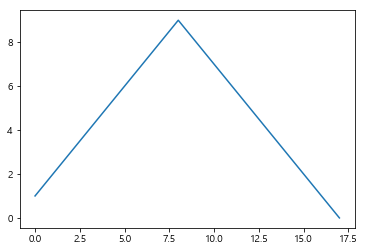

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot([x for x in range(1,10)] + [x for x in range(8,-1,-1)])
plt.show()

위는 너무 간단한 그래프이다  이번에는 numpy를 이용해서 sin을 만들고 그려보자

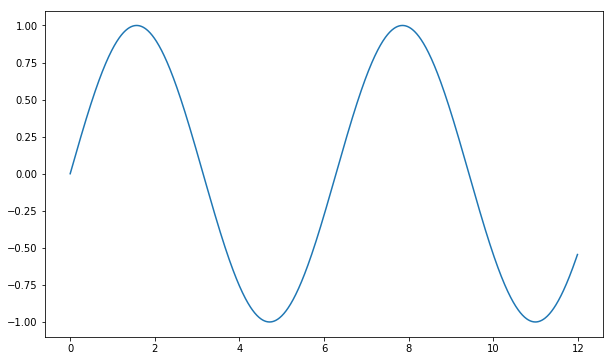

In [86]:
t = np.arange(0,12,0.01)
y = np.sin(t)
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.show()

이후의 기본적인 matplotlib 내용은 이미 많이 써봤기 때문에 생략

## 1-8 CCTV 현황 그래프로 분석하기
이제는 matplotlib를 이용해서 CCTV 현황을 그래프로 분석하려고 한다  
아직 하나의 문제가 남았는데, 바로 한글 문제이다. matplotlib는 한글을 지원하지 않기 때문에  
matplotlib의 폰트를 변경할 필요가 있다.  나는 윈도우를 사용하니까 윈도우에 맞게 설정하겠다

In [88]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

이제 다시 data_result를 확인해보자

In [90]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


여기서 pandas의 편리함이 또 나온다  
plandas 데이터 뒤에 plot 명령을 붙이면 바로 그려준다  

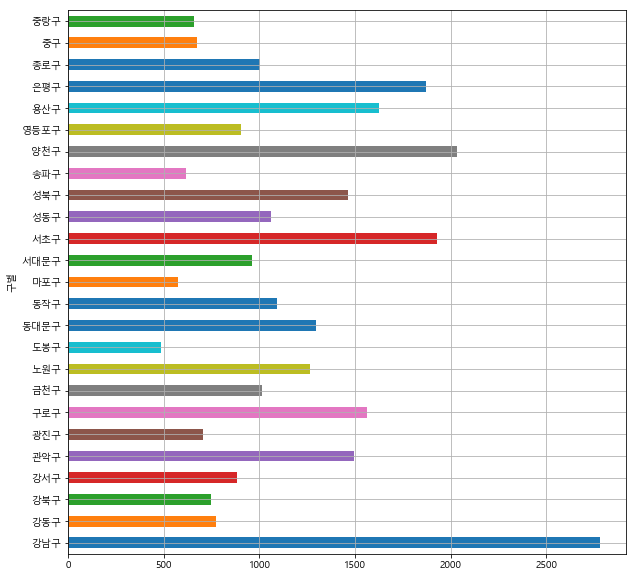

In [92]:
data_result['소계'].plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

위 그림은 보기가 어렵기 때문에 정렬시켜서 plot 해보자

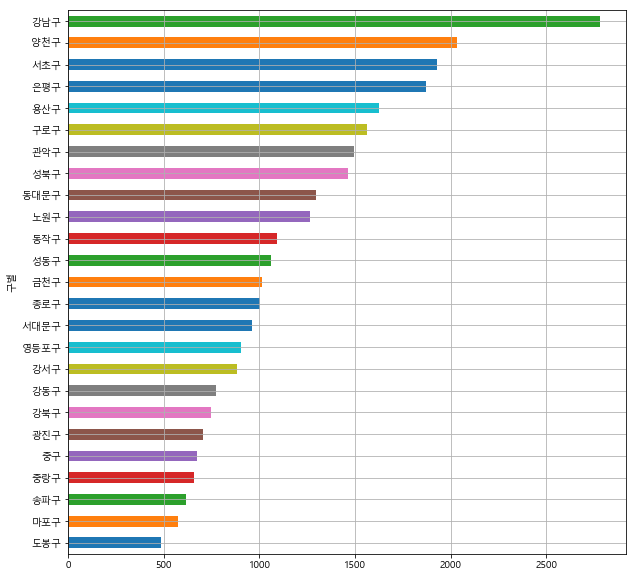

In [93]:
data_result['소계'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

이렇게 보면 각 구간에 어느 정도의 차이가 있는지도 한 눈에 파악할 수 있다  
그럼 이번에는 인구대비 CCTV 비율을 계산해서 정렬해보고 그려보자

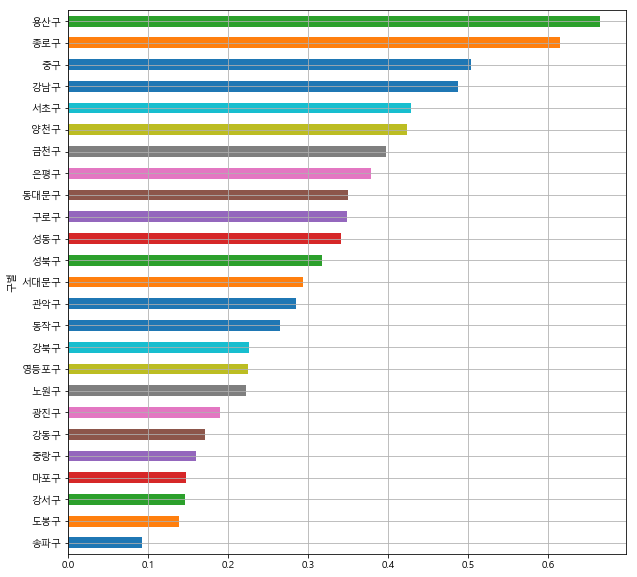

In [95]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

이제 이 정도만 해도 시각화 효과가 꽤 보인다  
이번에는 조금 더 나아가 scatter 함수를 사용해보자

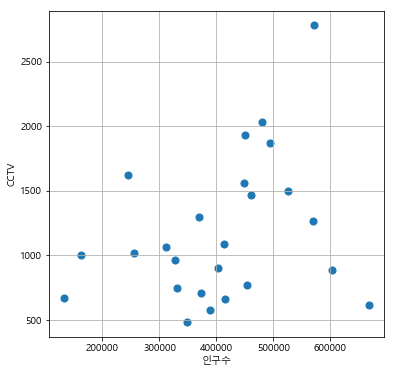

In [96]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

이제 저 데이터를 대표하는 직선을 하나 그리려고 한다  
어차피 이전 절에서 CCTV와 인구수는 양의 상관관계가 있다고 봤으니깐

In [98]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [99]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

NumPy의 polyfit 명령으로 손쉽게 직선을 만들 수 있다  
그리고 이를 그리기 위해서 x축과 y축 데이터를 얻어야하는데, x축 데이터는 np.linspace로, y축은 poly1d로 만들 수 있다

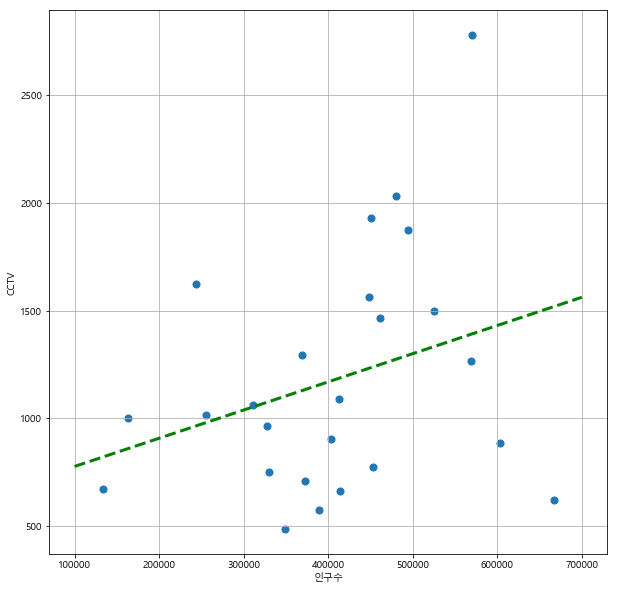

In [100]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

이제 여기에 두 가지 장치를 넣고 싶다  
하나는 직선이 이 전체 데이터의 대표 값 역할을 한다면, 그 경향에서 멀리 있는 구는 이름이 같이 나타나도록 하고 싶다는 것과  
직선에서 멀어질수록 다른 색을 나타내도록 하고 싶다는 것이다  
  
그래서 오차를 계산할 수 있는 코드를 만들고 오차가 큰 순으로 데이터를 정렬해서 다시 저장했다

In [101]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


이제 텍스트와 color map을 입히자

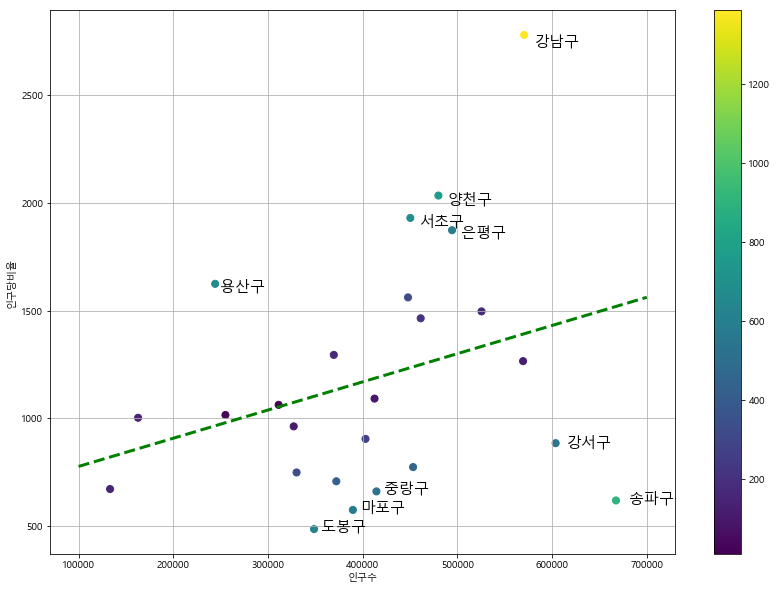

In [103]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],
            c=data_result['오차'],s=50)
plt.plot(fx, f1(fx), ls='dashed',lw=3,color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
             df_sort.index[n],fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid(True)
plt.show()

직선을 기준으로 위에 있는 강남구 양천구 서초구 은평구 용산구는 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 설치된 지역이다  
그리고 송파구 강서구 중랑구 마포구 도봉구는 일반적인 경향보다 CCTV가 적게 설치된 지역이다  
여기까지 1장 -끝-